In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import seaborn as sns
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.stats.diagnostic import unitroot_adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
#读取数据
data = pd.read_csv('covid_pa_confirmed_data_7d.csv')
data.index = pd.to_datetime(data['time_value'])
data.drop(['time_value'], axis=1, inplace=True)
data = data.value
data.head()

time_value
2020-02-20    0.0
2020-02-21    0.0
2020-02-22    0.0
2020-02-23    0.0
2020-02-24    0.0
Name: value, dtype: float64

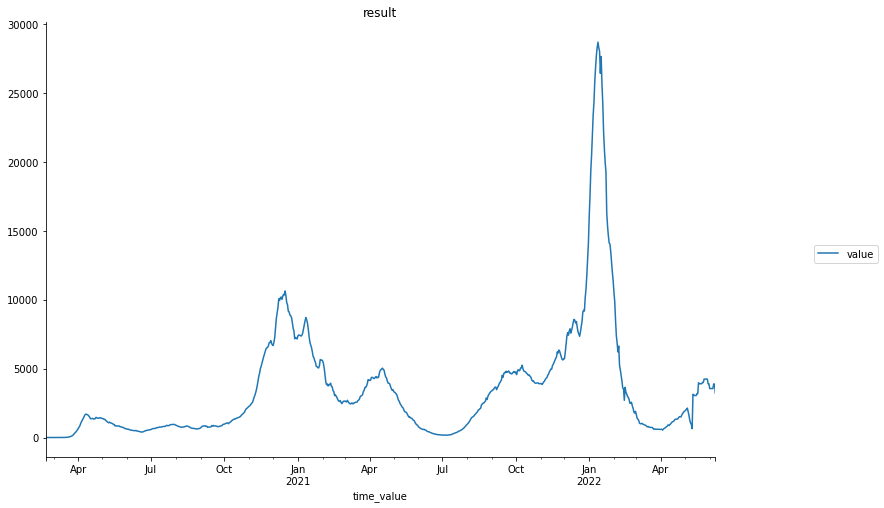

In [8]:
#数据大致情况展示
data.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title('result')
sns.despine()
plt.show()

In [9]:
#数据平稳性检测 因为只有平稳数据才能做时间序列分析
def judge_stationarity(data_sanya_one):
    dftest = ts.adfuller(data_sanya_one)
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    stationarity = 1
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        if dftest[0] > value:
                stationarity = 0
    print(dfoutput)
    print("是否平稳(1/0): %d" %(stationarity))
    return stationarity
stationarity = judge_stationarity(data)

(-3.127121261336678, 0.024610119278494928, 21, 818, {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}, 11202.685035464887)
Test Statistic                  -3.127121
p-value                          0.024610
#Lags Used                      21.000000
Number of Observations Used    818.000000
Critical Value (1%)             -3.438369
Critical Value (5%)             -2.865080
Critical Value (10%)            -2.568655
dtype: float64
是否平稳(1/0): 0


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38454 missing from current font.
  font.set_te

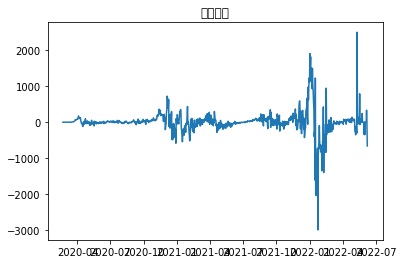

(-5.911601460418759, 2.630898697186796e-07, 20, 818, {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}, 11198.033604309308)
Test Statistic                -5.911601e+00
p-value                        2.630899e-07
#Lags Used                     2.000000e+01
Number of Observations Used    8.180000e+02
Critical Value (1%)           -3.438369e+00
Critical Value (5%)           -2.865080e+00
Critical Value (10%)          -2.568655e+00
dtype: float64
是否平稳(1/0): 1


In [10]:
#若不平稳进行一阶差分
if stationarity == 0:
    data_diff = data.diff()
    data_diff = data_diff.dropna()
    plt.figure()
    plt.plot(data_diff)
    plt.title('一阶差分')
    plt.show()
 
#再次进行平稳性检测
stationarity = judge_stationarity(data_diff)

In [15]:
#季节性分解
from statsmodels.tsa.seasonal import seasonal_decompose 



decomposition = seasonal_decompose(np.array(data),freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
plt.figure(figsize=[15, 7])
decomposition.plot()
print("test: p={}".format(ts.adfuller(seasonal)[1]))
 
#季节平稳性检测
stationarity = judge_stationarity(residual)

ImportError: attempted relative import with no known parent package